# Optimization via Stochastic Gradient Descent
Consider the dataset poly_regression_large.csv, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

- Split the dataset into training and test set as in the Homework 2, with a proportion of $80\%$ training and $20\%$ test.

- Fix a degree $K$ for the polynomial.

- Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.

- Train the polynomial regression model on the training set via the Gradient Descent algorithm.

- Train the polynomial regression model on the poly_regression_small.csv dataset. Use the full dataset for this test, without splitting it into training and test set.

- Compare the performance of the three regression model computed above. In particular, if $(X_{test} Y_{test})$ is the test set from the poly_regression_large.csv dataset, for each of the model, compute:

$$ \frac 1{N_{test}}\sum_{i=1}^{N_{test}}(f_{\theta}(x^i) - y^i)^2 $$ 
where $N_{test}$ is the number of elements in the test set, $(x^i,y^i)$ are the input and output elements in the test set. Comment the performance of the three models.

- Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.

Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^*=[0,0,4,0,-3]$.



Consider the dataset poly_regression_large.csv, provided on Virtuale, and let $f_\theta(x)$ be a polynomial regression model, as discussed in https://devangelista2.github.io/statistical-mathematical-methods/regression_classification/regression.html.

- Split the dataset into training and test set as in the Homework 2, with a proportion of $80\%$ training and $20\%$ test.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('./data/poly_regression_large.csv')

x = np.array(data["x"])
y = np.array(data["y"])

In [18]:
def split_data(X, Y, n_train):    # numbers of images on which work
    N = X.shape[0]
    
    # arrays of numbers
    idx = np.arange(N)
    # shuffle datas in order to have random training and test data
    np.random.shuffle(idx)
    
    # indexes 
    train_idx = idx[:n_train]
    test_idx = idx[n_train:]
    
    # X matrix
    X_train = X[train_idx]

    X_test = X[test_idx]
    
    # Y matrix
    Y_train = Y[train_idx]
    Y_test = Y[test_idx]
    
    return (X_train, Y_train), (X_test, Y_test)


n_train = int(0.8 * x.shape[0])
(X_train, Y_train), (X_test, Y_test) = split_data(x, y, n_train)
print(X_test.shape, X_train.shape)

(200,) (800,)


In [19]:
# polynomial regression model implementation
def f(X, theta, K=4):
    PhiX = vandermonde(X, K)
    return PhiX@theta

# defining the Vandermonde matrix
def vandermonde(x, K=4):
    N = x.shape[0]
    PhiX = np.zeros((N, K))
    for j in range(K):
       PhiX[:, j] = x**j  # in this way the first row (j=0) has all x**0=1s, and so on
    return PhiX


- Train the polynomial regression model on the training set via the Stochastic Gradient Descent algorithm.

In [20]:
# our loss function is the MSE
def loss(theta, X, y, K=4):
    y_pred = f(X, theta, K)
    error = np.square(y_pred - y)
    return np.mean(error)
    
def grad_loss(theta, X, y, K=4):
    PhiX = vandermonde(X, K)
    return PhiX.T @ (PhiX @ theta - y)


In [21]:

def SGD(loss, grad_loss, D, theta0, alpha, K=4, batch_size=5, n_epochs=100):
    X, y = D  # Unpack the data
    N = X.shape[0] # We assume both X and Y has shape (N, )
    d = theta0.shape[0] # While theta0 has shape (d, )
    idx = np.arange(0, N) # This is required for the shuffling
    
    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each epoch
    
    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch, K)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))


            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y, K)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
    
    return theta_history


# fixing K=4
K = 4
theta0 = np.ones((K,))

SGD_theta_history = SGD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.01)
print(f"SGD: The best set of theta found is: {SGD_theta_history[-1]}")

SGD: The best set of theta found is: [-0.22515412  2.10771184  0.78862968 -1.42586017]


- Train the polynomial regression model on the training set via the Gradient Descent algorithm.

In [22]:
def GD(loss, grad_loss, D, theta0, alpha, K, maxit = 1000, tolf=1e-5, tolx=1e-5):
    X, y = D  # Unpack the data
    d = theta0.shape[0] # While theta0 has shape (d, )

    # Initialization of history vectors
    theta_history = np.zeros((maxit+1, d))  # Save parameters at each epoch
    loss_history = np.zeros((maxit+1, ))  # Save loss values at each epoch
    grad_norm_history = np.zeros((maxit+1, ))  # Save gradient norms at each epoch
    
    theta_history[0] = theta0
    loss_history[0] = loss(theta0, X, y, K, )
    gradient = grad_loss(theta0, X, y, K)
    grad_norm_history[0] = np.linalg.norm(gradient, 2)
    
    for k in range(maxit):
        # Update weights

        theta = theta0 - alpha * gradient
        
        # Compute the gradient of the loss
        gradient = grad_loss(theta, X, y, K)

        # Save the updated values
        theta_history[k+1] = theta
        loss_history[k+1] = loss(theta, X, y, K)
        grad_norm_history[k+1] = np.linalg.norm(gradient)
        
        if np.linalg.norm(gradient, 2) < tolf*grad_norm_history[0] or np.linalg.norm(theta-theta0, 2)<tolx:
            break
        
        theta0 = theta
        
    theta_history = theta_history[:k+1] 
    loss_history = loss_history[:k+1]
    grad_norm_history = grad_norm_history[:k+1]
    
    return theta_history

K=4
theta0 = np.ones((K,))
GD_theta_history = GD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.001, K=4)
print(f"GD: The best set of theta found is: {GD_theta_history[-1]}")
    

GD: The best set of theta found is: [-0.22950527  2.10723495  0.78528591 -1.4256062 ]


- Train the polynomial regression model on the poly_regression_small.csv dataset. Use the full dataset for this test, without splitting it into training and test set.

As is not specified, i will use the GD method.

In [23]:
data = pd.read_csv('./data/poly_regression_small.csv')

x_small = data["x"]
y_small = data["y"]

In [24]:
theta0 = np.ones((K,))
GD_small_theta_history = GD(loss, grad_loss, (x_small, y_small), theta0, alpha=0.001, K=4)
print(f"GD_smallDataSet: The best set of theta found for the small dataset, is: {GD_small_theta_history[-1]}")

GD_smallDataSet: The best set of theta found for the small dataset, is: [0.08444428 0.95801332 0.46184484 0.02550253]


In [25]:
def compute_mse(y_true, y_pred):
    N_test = y_true.shape[0]
    return np.sum((y_pred - y_true) ** 2) / N_test


def compare_models(X_test, Y_test, GD_theta_history, SGD_theta_history, GD_small_theta_history, K):
    # Compute the predictions for each model
    y_pred_gd = f(X_test, GD_theta_history, K) 
    y_pred_sgd = f(X_test, SGD_theta_history, K) 
    y_pred_small = f(x_small, GD_small_theta_history, K)

    # compute the Mean Square Error
    mse_gd = compute_mse(Y_test, y_pred_gd)
    mse_sgd = compute_mse(Y_test, y_pred_sgd)
    mse_small = compute_mse(y_small, y_pred_small)


    print(f"Mean Squared Error (GD): {mse_gd}")
    print(f"Mean Squared Error (SGD): {mse_sgd}")
    print(f"Mean Squared Error (Small Dataset): {mse_small}")

    # Comment on the performance based on MSE
    if mse_gd < mse_sgd and mse_gd < mse_small:
        print("Gradient Descent performs best.")
    elif mse_sgd < mse_gd and mse_sgd < mse_small:
        print("Stochastic Gradient Descent performs best.")
    else:
        print("Gradient Descent on the small dataset performs best.")
        
# keeping the best set of theta 
GD_theta_history_best, SGD_theta_history_best, GD_small_theta_history = GD_theta_history[-1], SGD_theta_history[-1], GD_small_theta_history[-1]
compare_models(X_test, Y_test, GD_theta_history_best, SGD_theta_history_best, GD_small_theta_history, K=4)

Mean Squared Error (GD): 0.016143487673708032
Mean Squared Error (SGD): 0.01605155574169145
Mean Squared Error (Small Dataset): 0.04914917708690119
Stochastic Gradient Descent performs best.


- Repeat the experiment by varying the degree $K$ of the polynomial. Comment the results.


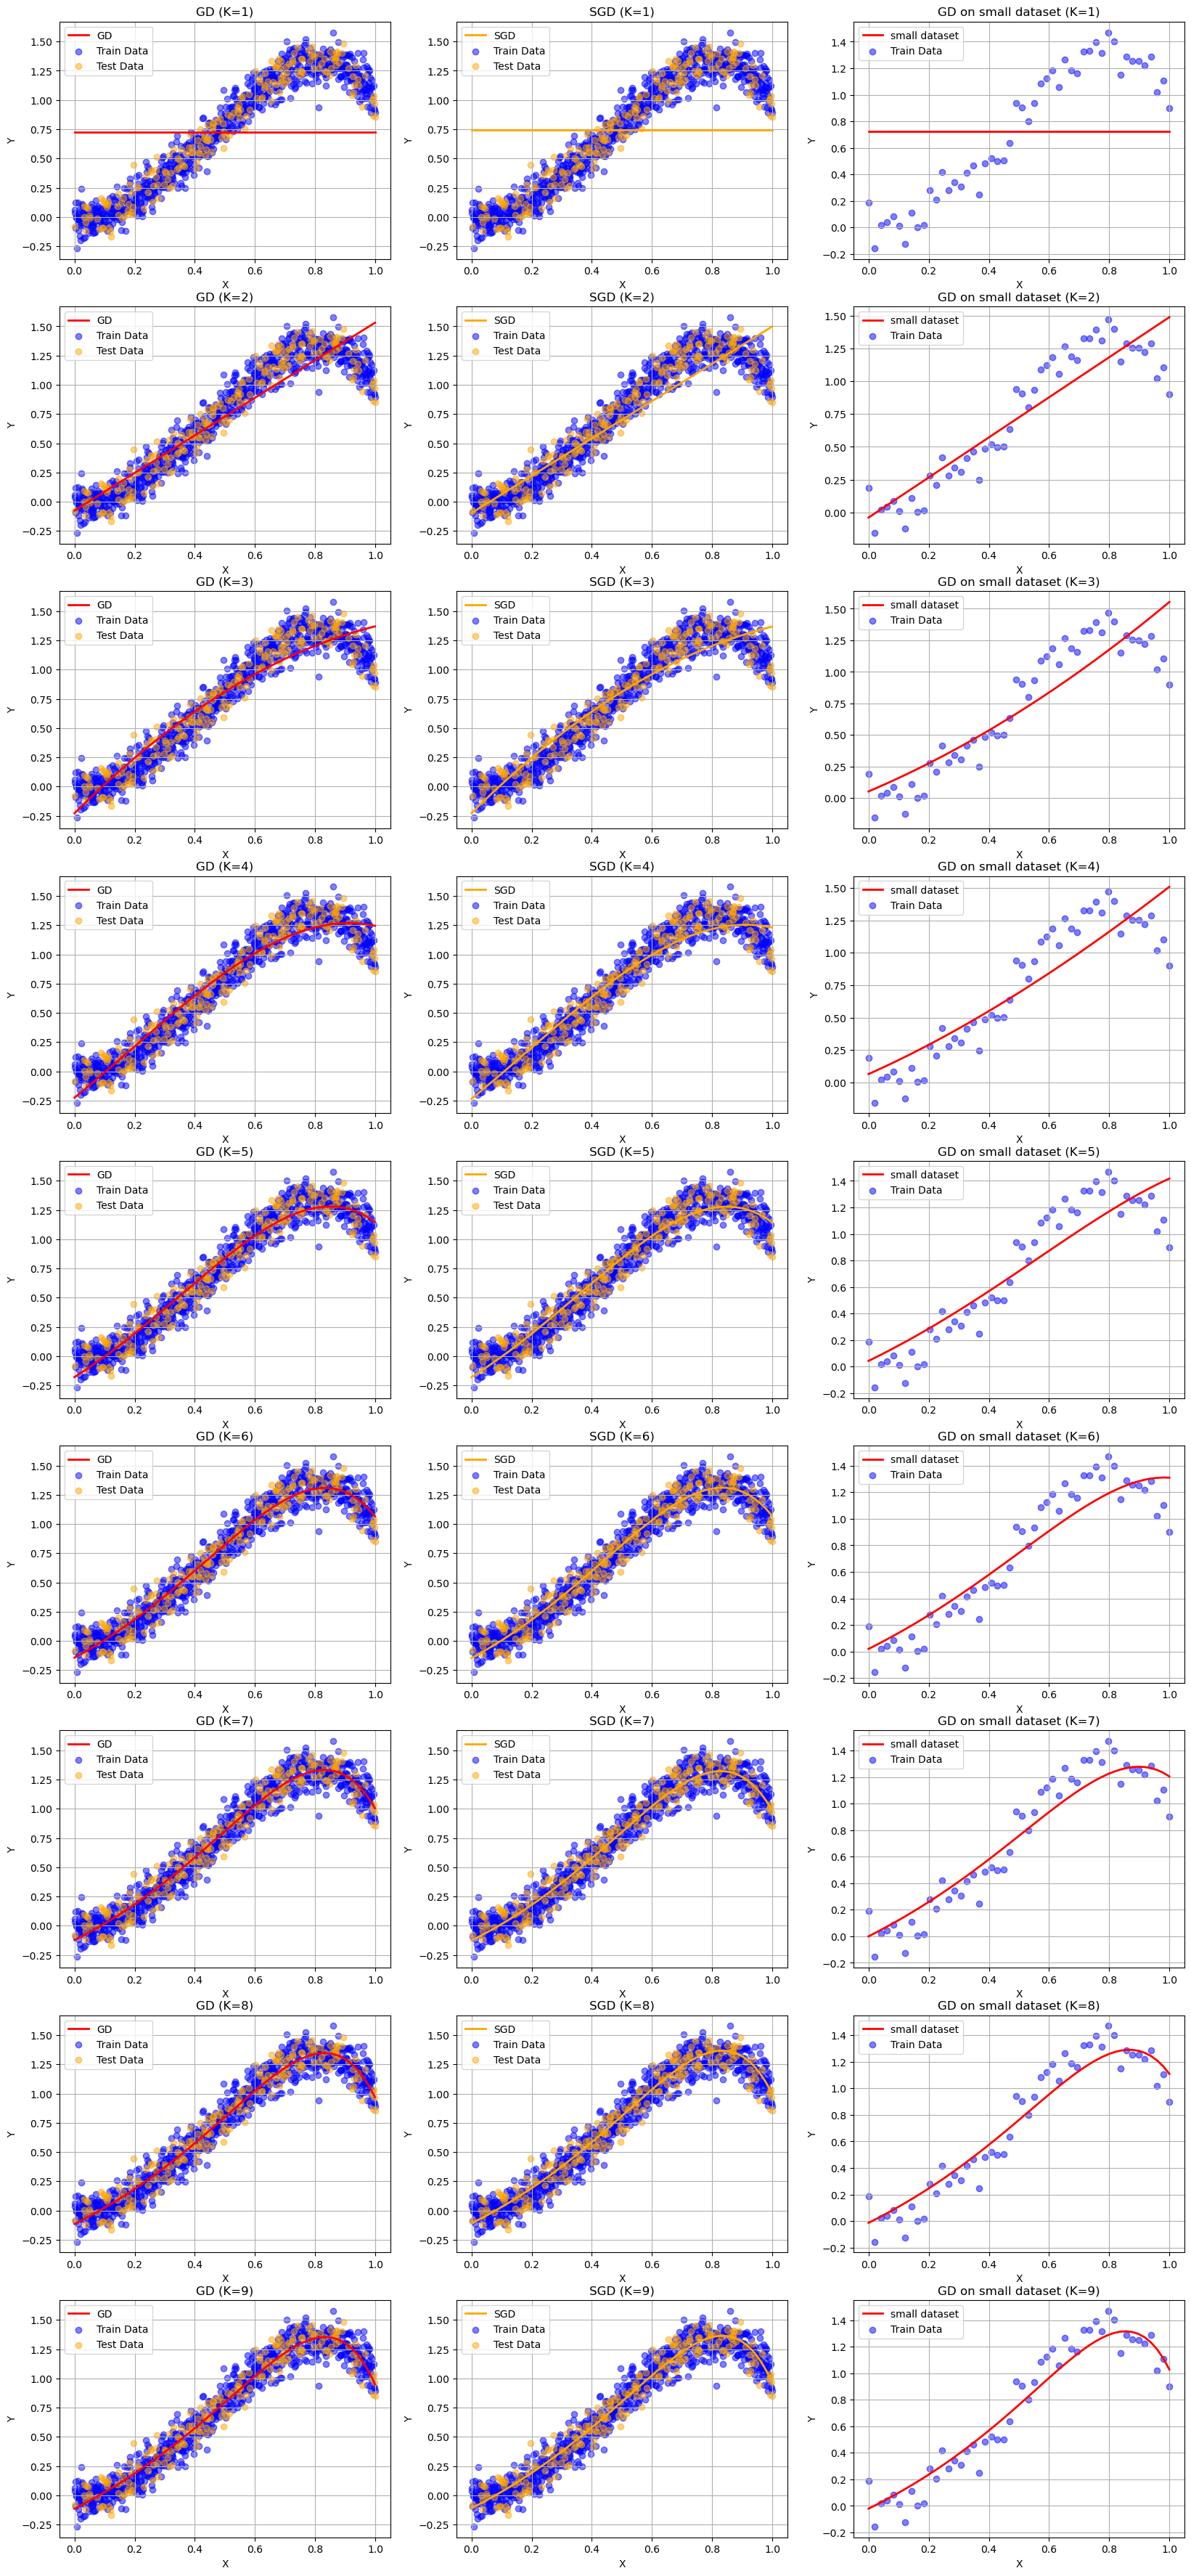

In [26]:
def experiment(X_train, Y_train, X_test, Y_test, x_small, y_small):
    k_values = [k for k in range(1,10)]
    plt.figure(figsize=(20, len(k_values) * 5))  
    
    for i, k in enumerate(k_values):
        theta0 = np.zeros((k,))
        
        # Perform regression using GD, SGD, and Cholesky
        GD_theta_history  = GD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.001, K=k)
        SGD_theta_history = SGD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.01, K=k)
        GD_small_theta_history = GD(loss, grad_loss, (x_small, y_small), theta0, alpha=0.001, K=k)

        # Generate predictions for each method
        y_gd = f(X_train, GD_theta_history[-1], k)          
        y_sgd = f(X_train, SGD_theta_history[-1], k)        
        y_pred_small = f(x_small, GD_small_theta_history[-1], k)
        
        # **Column 1:** Plot GD results
        plt.subplot(len(k_values), 3, i * 3 + 1)  
        
        plt.plot(X_train, y_gd, label='GD', color='red', linewidth=2)  
        plt.scatter(X_train, Y_train, color='blue', label='Train Data', alpha=0.5)  
        plt.scatter(X_test, Y_test, color='orange', label='Test Data', alpha=0.5)   
        
        plt.title(f'GD (K={k})')  
        plt.xlabel('X')           
        plt.ylabel('Y')           
        plt.legend()              
        plt.grid(True)            

        # **Column 2:** Plot SGD results
        plt.subplot(len(k_values), 3, i * 3 + 2)  
        
        plt.plot(X_train, y_sgd, label='SGD', color='orange', linewidth=2) 
        plt.scatter(X_train, Y_train, color='blue', label='Train Data', alpha=0.5)  
        plt.scatter(X_test, Y_test, color='orange', label='Test Data', alpha=0.5)   
        
        plt.title(f'SGD (K={k})')  
        plt.xlabel('X')           
        plt.ylabel('Y')           
        plt.legend()              
        plt.grid(True)            

        # **Column 3:** Plot Cholesky results
        plt.subplot(len(k_values), 3, i * 3 + 3) 
        
        plt.plot(x_small, y_pred_small, label='small dataset', color='red', linewidth=2)  
        plt.scatter(x_small, y_small, color='blue', label='Train Data', alpha=0.5)    
        
        plt.title(f'GD on small dataset (K={k})')  
        plt.xlabel('X')           
        plt.ylabel('Y')           
        plt.legend()              
        plt.grid(True)     
    

    plt.show()
    

n_train = int(0.8 * x.shape[0])
(X_train, Y_train), (X_test, Y_test) = split_data(x, y, n_train)

sorted_indices = np.argsort(X_train)
X_train = X_train[sorted_indices]
Y_train = Y_train[sorted_indices]

experiment(X_train, Y_train, X_test, Y_test, x_small, y_small)

Set $K=5$ (so that the polynomial regression model is a polynomial of degree 4). Compare the parameters learned by the three models with the true parameter $\theta^*=[0,0,4,0,-3]$.

In [27]:
# compute the MSE between the true theta and the computed one
def mse(theta_computed, theta_true):
    return np.mean((theta_computed - theta_true)**2)

MSE for GD (with full dataset): 2.5955096667154782
MSE for SGD: 2.5928933393145
MSE for GD (with small dataset): 4.037407716347699


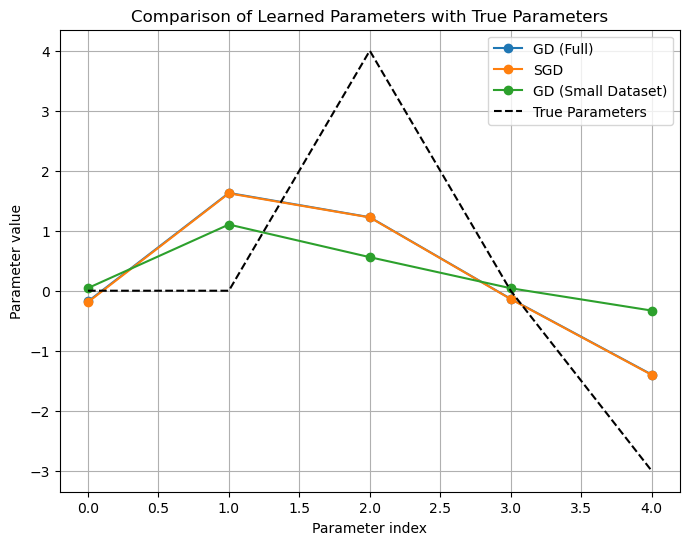

In [28]:
theta_true = np.array([0, 0, 4, 0, -3])
k = 5

theta0 = np.zeros((k,))

# compute the three models with k = 5
GD_theta_history  = GD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.001, K=k)
SGD_theta_history = SGD(loss, grad_loss, (X_train, Y_train), theta0, alpha=0.01, K=k)
GD_small_theta_history = GD(loss, grad_loss, (x_small, y_small), theta0, alpha=0.001, K=k)

# Compute MSE for each method
GD_mse = mse(GD_theta_history[-1], theta_true)
SGD_mse = mse(SGD_theta_history[-1], theta_true)
GD_small_mse = mse(GD_small_theta_history[-1], theta_true)


# Print the MSE for each method
print(f'MSE for GD (with full dataset): {GD_mse}')
print(f'MSE for SGD: {SGD_mse}')
print(f'MSE for GD (with small dataset): {GD_small_mse}')


# Plot the learned parameters vs the true parameters
methods = ['GD (Full)', 'SGD', 'GD (Small Dataset)']
learned_params = [GD_theta_history[-1], SGD_theta_history[-1], GD_small_theta_history[-1]]

plt.figure(figsize=(8, 6))
for i, params in enumerate(learned_params):
    plt.plot(np.arange(k), params, label=f'{methods[i]}', marker='o')

# Plot the true parameters 
plt.plot(np.arange(k), theta_true, label='True Parameters', linestyle='--', color='black')

plt.xlabel('Parameter index')
plt.ylabel('Parameter value')
plt.title('Comparison of Learned Parameters with True Parameters')
plt.legend()
plt.grid(True)
plt.show()

As we can observe, the set of parameters $\theta$ computed by the three models is quite different from the true set of parameters. Moreover, the parameters $\theta$ computed using GD are nearly identical to those computed using SGD (indeed the blue plot is below the orange one). 